# SQL Request for day 8 Advent Coda 2025
## I will start to view children

In [3]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:////home/thomas/Documents/Coda/Projets/coda-advent-2025/day-8/Jupyter/data/kids.db")
with engine.connect() as connection:
    children = pd.read_sql(sql="SELECT first_name, last_name FROM children LIMIT 3", con=connection)
print(children)

  first_name last_name
0      Layla    Santos
1     Haruto       Kim
2  Valentina    Romero


## I will now show countries for each child

In [22]:
with engine.connect() as connection:
    countries = pd.read_sql(sql="SELECT children.first_name, children.last_name, cities.lat, cities.lon, cities.country_code FROM children JOIN households ON children.household_id = households.id JOIN cities ON households.city_id = cities.id LIMIT 3", con=connection)
print(countries)

  first_name last_name        lat         lon country_code
0      Layla    Santos  45.764000    4.835700           FR
1     Haruto       Kim  47.901667    1.905853           US
2  Valentina    Romero -33.868800  151.209300           AU


## I will now show behavior for each child

In [24]:
with engine.connect() as connection:
    behavior = pd.read_sql(sql="SELECT children.first_name, children.last_name, cities.lat, cities.lon, cities.country_code, behavior.nice_score FROM children JOIN households ON children.household_id = households.id JOIN cities ON households.city_id = cities.id JOIN behavior ON children.id = behavior.child_id LIMIT 3", con=connection)
print(behavior)

  first_name last_name        lat         lon country_code  nice_score
0      Layla    Santos  45.764000    4.835700           FR      69.233
1     Haruto       Kim  47.901667    1.905853           US      64.697
2  Valentina    Romero -33.868800  151.209300           AU      65.025


## I will now show the best child due to their nice score

In [30]:
with engine.connect() as connection:
    order = pd.read_sql(sql="SELECT children.first_name, children.last_name, cities.lat, cities.lon, cities.country_code, behavior.nice_score FROM children JOIN households ON children.household_id = households.id JOIN cities ON households.city_id = cities.id JOIN behavior ON children.id = behavior.child_id ORDER BY behavior.nice_score DESC LIMIT 3", con=connection)
print(order)

  first_name  last_name        lat        lon country_code  nice_score
0     Astrid      Lopez  47.354453    5.04734           FR       100.0
1       Isha  Takahashi  39.904200  116.40740           CN       100.0
2       Omar      Costa  47.354453    5.04734           US       100.0


## I will now show the elf plan for each child

In [51]:
with engine.connect() as connection:
    elf_plan = pd.read_sql(sql="SELECT children.first_name, children.last_name, cities.lat, cities.lon, cities.country_code, behavior.nice_score, elf_plan.x_m, elf_plan.y_m FROM children JOIN households ON children.household_id = households.id JOIN cities ON households.city_id = cities.id JOIN behavior ON children.id = behavior.child_id JOIN elf_plan ON elf_plan.child_id = children.id  ORDER BY behavior.nice_score DESC LIMIT 3", con=connection)
print(elf_plan)

  first_name  last_name        lat        lon country_code  nice_score  \
0     Astrid      Lopez  47.354453    5.04734           FR       100.0   
1       Isha  Takahashi  39.904200  116.40740           CN       100.0   
2       Omar      Costa  47.354453    5.04734           US       100.0   

            x_m           y_m  
0  2.638502e+05  6.253826e+06  
1  1.295666e+07  4.853111e+06  
2 -1.362686e+07  4.549886e+06  


## Demo final of what asked for

In [52]:
with engine.connect() as connection:
    demo = pd.read_sql(sql="SELECT children.first_name, children.last_name, cities.lat, cities.lon, cities.country_code, behavior.nice_score, elf_plan.x_m, elf_plan.y_m FROM children JOIN households ON children.household_id = households.id JOIN cities ON households.city_id = cities.id JOIN behavior ON children.id = behavior.child_id JOIN elf_plan ON elf_plan.child_id = children.id  ORDER BY behavior.nice_score DESC LIMIT 3", con=connection)
print(demo)

  first_name  last_name        lat        lon country_code  nice_score  \
0     Astrid      Lopez  47.354453    5.04734           FR       100.0   
1       Isha  Takahashi  39.904200  116.40740           CN       100.0   
2       Omar      Costa  47.354453    5.04734           US       100.0   

            x_m           y_m  
0  2.638502e+05  6.253826e+06  
1  1.295666e+07  4.853111e+06  
2 -1.362686e+07  4.549886e+06  


## Visual Earth

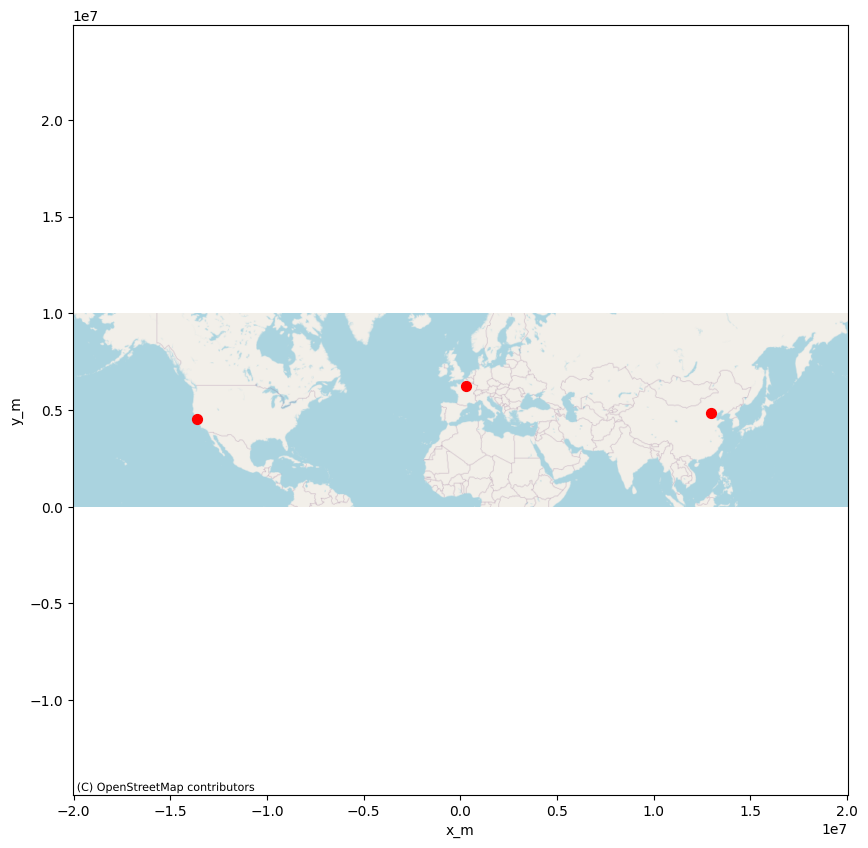

In [56]:
import contextily as ctx
import matplotlib.pyplot as plt

# On crée le graphique à partir du DataFrame
ax = demo.plot.scatter(x='x_m', y='y_m', figsize=(10, 10), color='red', s=50)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.axis('equal')
plt.show()

## I want to view the best countries in relation to their best score

In [4]:
with engine.connect() as connection:
    final = pd.read_sql(sql="SELECT cities.lat, cities.lon, cities.country_code, AVG(behavior.nice_score) AS moyenne_nice_score FROM children JOIN households ON children.household_id = households.id JOIN cities ON households.city_id = cities.id JOIN behavior ON children.id = behavior.child_id GROUP BY cities.country_code ORDER BY moyenne_nice_score DESC LIMIT 4", con=connection)
print(final)

         lat        lon country_code  moyenne_nice_score
0  47.901667   1.905853           US           70.811972
1  47.901667   1.905853           MX           70.640608
2  30.044400  31.235700           EG           70.579633
3  12.971600  77.594600           IN           70.476082
